## Loading the necessary libraries and MNIST Dataset

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

Seeing Some Images From The Dataset

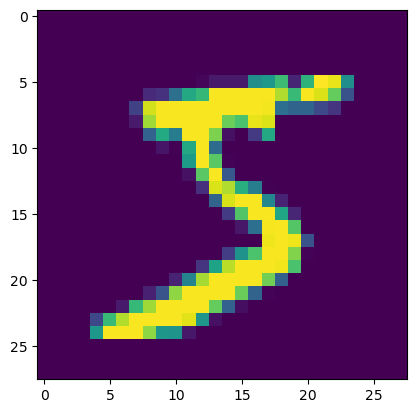

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

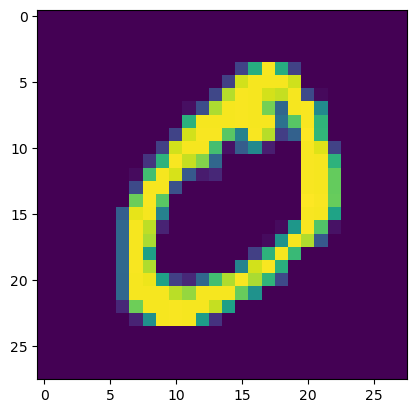

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [12]:
X_train = X_train/255
X_test = X_test/255

Buiding the Model

In [14]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 1.0289 - accuracy: 0.6894 - val_loss: 0.5853 - val_accuracy: 0.8315
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5022 - accuracy: 0.8532 - val_loss: 0.3899 - val_accuracy: 0.8892
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3841 - accuracy: 0.8884 - val_loss: 0.3441 - val_accuracy: 0.8998
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3420 - accuracy: 0.9010 - val_loss: 0.3072 - val_accuracy: 0.9128
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3155 - accuracy: 0.9084 - val_loss: 0.2870 - val_accuracy: 0.9177
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2930 - accuracy: 0.9147 - val_loss: 0.2669 - val_accuracy: 0.9256
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2748 - accuracy: 0.9194 - val_loss: 0.2534 - val_accuracy:

In [19]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
y_pred = y_prob.argmax(axis=1)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9157

Plotting grapgh between Loss and Val loss

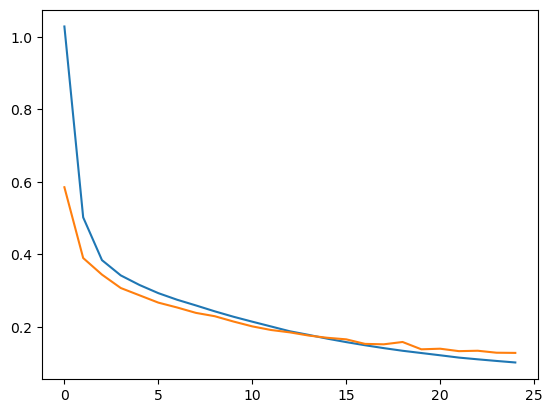

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Plotting Graph between accuracy and Val accuracy

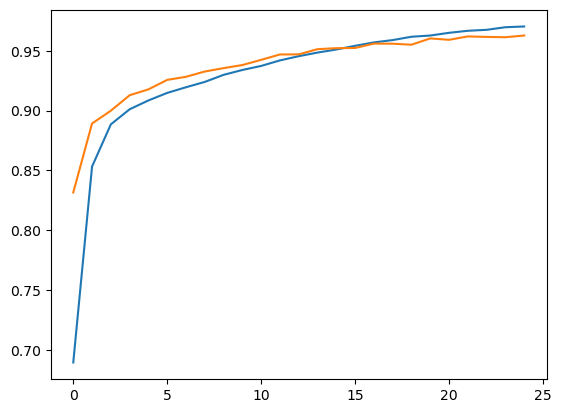

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Predicting of Numbers from 0 to 9 


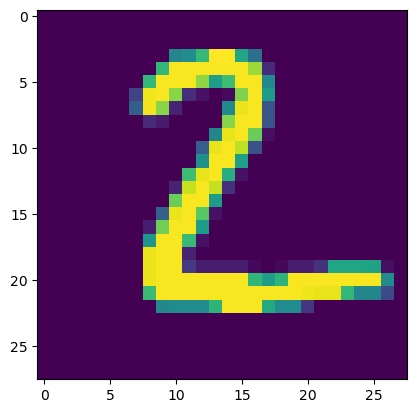

In [24]:
plt.imshow(X_test[1])

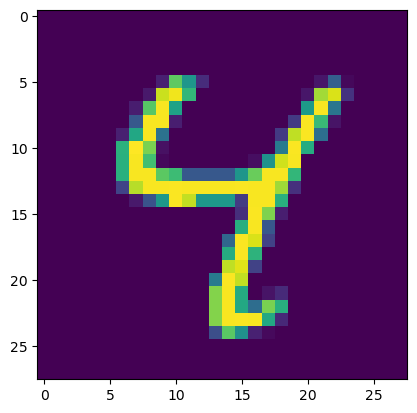

In [26]:
plt.imshow(X_test[6])

In [27]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 16ms/step


array([2], dtype=int64)

In [28]:
model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 25ms/step


array([4], dtype=int64)